# This notebook is for Task 5 only

Improvements Task 5:
- Refer to whatsapp
- Composite of multi views/plots:
    + One is the height histogram 
    + One is the overall histogram (slidable)
    + Filter by dropdown country / region
    + Dropdown affects height and overall, overall also affects height
- Limit number of countries per region

In [1]:
# imports
import altair as alt
import pandas as pd
import sys
import os
# altair specific
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')
# adds parent directory to this notebook, so it could use relative import
sys.path.append(os.path.dirname(os.getcwd()))

# user defined modules
from src.helpers import get_data


In [2]:
# read data here
data_path = "../data/player_raw_data.csv"
# this is raw data
fifa = get_data(data_path)
# this is processed for Task 5 specific
subset = get_data(data_path, preprocess=True)

> 5. Find the range of height that has the best average overall ranking by country 
>
>    (how to phrase this but just finding the best height for performance) (interactive)

To accomplish this:
- One dropdown to control the country
- One plot of `overall histogram` that could brushed to serve as slider
- One plot of `height counts`, linked with `overall histogram`

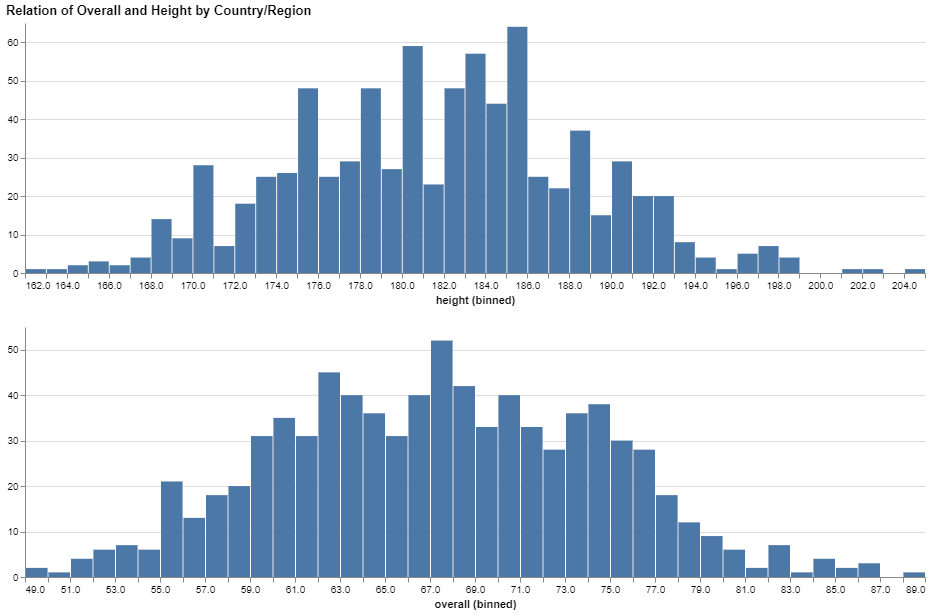

In [6]:

def task_five_viz(data):
    # this is required processing to handle extra option of All regions together
    dup = data.copy()
    dup["country"] = "All"
    data = pd.concat([subset, dup])
    
    # list of countries and countries
    countries = sorted(data.country.unique())
    countries.remove("All")
    countries.insert(0, "All")
    regions = sorted(data.region.unique())
    
    # slider
    brush = alt.selection_interval(
        encodings=["x"], # THis is hard to control both x and y, preferably use one encoding only
        resolve="global", # "intersect"
        empty="all" # add option to by default it selects all, to change this use "none" instead
    )
    
    # selector
    selection = alt.selection_single(
        name="Select",
        fields=["country", "region"],
        init={"country": "All", "region": "Africa"},
        bind={"country": alt.binding_select(options=countries),
              "region": alt.binding_radio(options=regions)
             }
    )
    
    # histogram for height and overall
    base_hist = alt.Chart(data).mark_bar().encode(
        x = alt.X(alt.repeat("row"), type="quantitative",
                  bin=alt.Bin(maxbins=50)
                 ),
        y = alt.Y('count():Q', title=None)
    )
    # adding these by layers and render it
    ovr_height_hist = alt.layer(base_hist.add_selection(brush).encode(
                                color=alt.value('lightgrey')
    ),
                    base_hist.transform_filter(brush)
    ).properties(
        width=900,
        height=250
    ).repeat(
        row=['height', 'overall'],
        data=data
    ).configure_view(
        stroke='transparent' # no outline
    ).add_selection(selection).transform_filter(selection).properties(
        title="Relation of Overall and Height by Country/Region"
    ) # add extra drop down
    # NOTE countries is not updating dynamically
    # Check this https://stackoverflow.com/questions/61754243/altair-controlling-one-dropdown-using-another
    return ovr_height_hist

viz = task_five_viz(data=subset) 
viz # use this instead
#viz.interactive() # THiS is extremely hard to control use wisely